### Start by definining network architecture

In [11]:
%matplotlib inline

In [1]:
import os
base_dir = '/home/ubuntu/deep-learning/cats_vs_dogs'
# Making folders to store the training, test and validation data
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape= (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))



Using TensorFlow backend.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Initial convnet transforms input 150x150x3 to a 6272 dim feature vector that then goes through a dense network

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Model has been defined, but need to transform input and targets to suitable tensors first

In [5]:
# we will use the ImageDataGenerator which generates batches of tensors of JPEG images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Note that flow_from_directory excpects a directory that has the two classes of images in separate subdirectories
# so we will point it at train_dir
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Now to train the model

In [6]:
# using fit_generator here as we have batches generated by a generator  
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs=30, validation_data = validation_generator, validation_steps=50)




Epoch 1/30





100/100 [==============================] - 85s 852ms/step - loss: 0.6956 - acc: 0.5295 - val_loss: 0.6767 - val_acc: 0.5400
Epoch 2/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6658 - acc: 0.6035 - val_loss: 0.6597 - val_acc: 0.5930
Epoch 3/30
100/100 [==============================] - 8s 79ms/step - loss: 0.6237 - acc: 0.6630 - val_loss: 0.6410 - val_acc: 0.6230
Epoch 4/30
100/100 [==============================] - 8s 79ms/step - loss: 0.5807 - acc: 0.6925 - val_loss: 0.6041 - val_acc: 0.6740
Epoch 5/30
100/100 [==============================] - 8s 81ms/step - loss: 0.5487 - acc: 0.7155 - val_loss: 0.6530 - val_acc: 0.6370
Epoch 6/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5099 - acc: 0.7525 - val_loss: 0.6086 - val_acc: 0.6690
Epoch 7/30
100/100 [==============================] - 8s 77ms/step - loss: 0.4816 - acc: 0.7615 - val_loss: 0.5871 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 8s 78

### Save the model 

In [7]:
model.save('cats_and_dogs_small_1.h5')

### Plotting loss and accuracy during training now

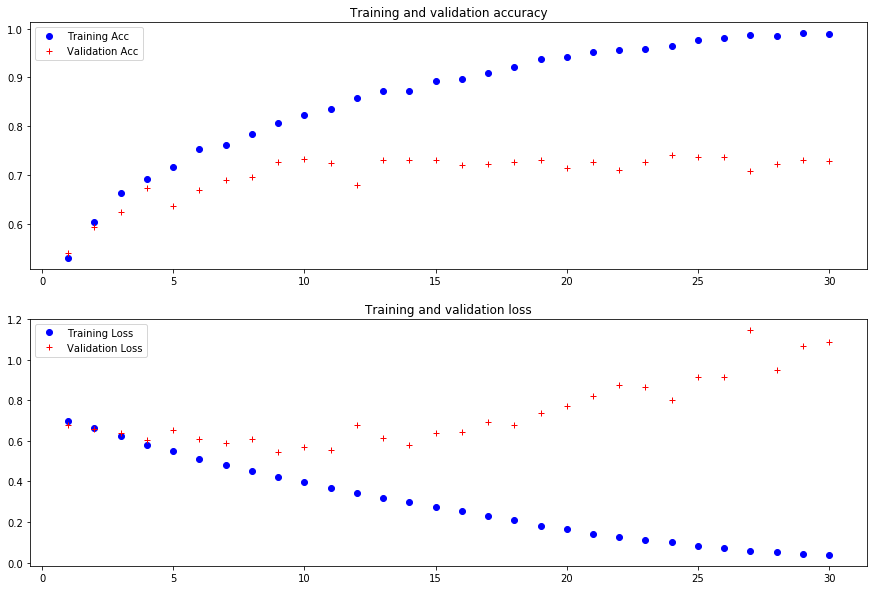

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, figsize=(15,10))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(acc)+1)

axs[0].plot(epochs, acc, 'bo', label='Training Acc')
axs[0].plot(epochs, val_acc, 'r+', label='Validation Acc')
axs[0].set_title('Training and validation accuracy')
axs[0].legend()
plt.figure()

axs[1].plot(epochs, loss, 'bo', label='Training Loss')
axs[1].plot(epochs, val_loss, 'r+', label='Validation Loss')
axs[1].set_title('Training and validation loss')
axs[1].legend()

plt.show()
